In [ ]:
# Module 3: Image Averaging for Noise Reduction and Comparing using Image Subtraction

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Take a clean grayscale image
im1 = cv2.imread('/content/house.jpg', cv2.IMREAD_GRAYSCALE)

# Function to add noise to the image
def add_noise(im, noise_level):
    height, width = im.shape

    # Generate random noise with the same shape as the image
    noise = np.random.normal(loc = 0, scale = noise_level, size = (height, width))

    # Add the noise to the image
    noisy_im = im + noise

    # Clip the pixel values to ensure they stay within the valid range 0 to 255 for uint8 images)
    noisy_im = np.clip(noisy_im, 0, 255).astype(np.uint8)

    return noisy_im

# Function to return number of noisy images required by the user (For averaging, more the better)
def noisy_images_num(im, n, noise_level):
    num = []
    for _ in range(n + 1):
        noisy_image = add_noise(im, noise_level)
        num.append(noisy_image)

    return num

# Perform image averaging
def image_averaging(images):
    # Convert the images list to a numpy array for easier manipulation
    images_np = np.array(images)

    # Calculate the average of the images along the first axis (axis=0)
    average_image = np.mean(images_np, axis = 0)

    # Convert the average image back to uint8 for proper display
    average_image = np.uint8(average_image)

    return average_image

(-0.5, 511.5, 511.5, -0.5)

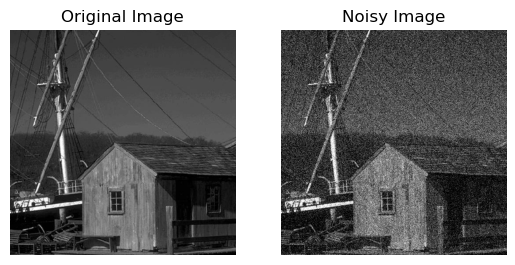

In [ ]:
# Perform image averaging on the noisy images
noisy_images_5 = noisy_images_num(im1, 5, 40)
noisy_images_100 = noisy_images_num(im1, 100, 40)
noisy_images_500 = noisy_images_num(im1, 500, 40)

averaged_image_5 = image_averaging(noisy_images_5)
averaged_image_100 = image_averaging(noisy_images_100)
averaged_image_500 = image_averaging(noisy_images_500)

plt.subplot(121)
plt.imshow(im1, cmap = 'gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(noisy_images_5[0], cmap = 'gray')
plt.title('Noisy Image')
plt.axis('off')

(-0.5, 511.5, 511.5, -0.5)

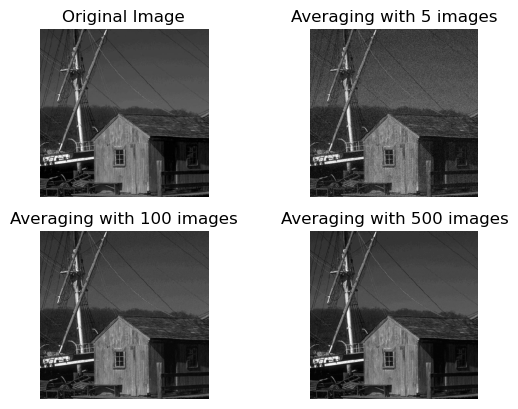

In [ ]:
plt.subplot(221)
plt.imshow(im1, cmap = 'gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(222)
plt.imshow(averaged_image_5, cmap = 'gray')
plt.title('Averaging with 5 images')
plt.axis('off')

plt.subplot(223)
plt.imshow(averaged_image_100, cmap = 'gray')
plt.title('Averaging with 100 images')
plt.axis('off')

plt.subplot(224)
plt.imshow(averaged_image_500, cmap = 'gray')
plt.title('Averaging with 500 images')
plt.axis('off')

In [ ]:
# Use image subtraction to compare

def image_subtraction(image1, image2):

    # Perform the subtraction
    subtracted_image = cv2.subtract(image1, image2)

    # Normalize the result to the range [0, 255] for proper display
    subtracted_image = cv2.normalize(subtracted_image, None, 0, 255, cv2.NORM_MINMAX)

    return subtracted_image


(-0.5, 511.5, 511.5, -0.5)

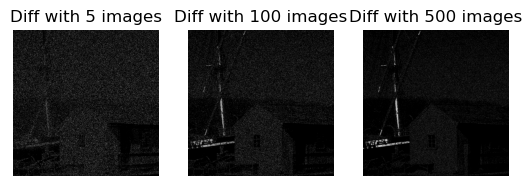

In [ ]:
# Perform image subtraction between clean_image and averaged_image
subtracted_image_5 = image_subtraction(im1, averaged_image_5)
subtracted_image_100 = image_subtraction(im1, averaged_image_100)
subtracted_image_500 = image_subtraction(im1, averaged_image_500)

plt.subplot(131)
plt.imshow(subtracted_image_5, cmap = 'gray')
plt.title('Diff with 5 images')
plt.axis('off')

plt.subplot(132)
plt.imshow(subtracted_image_100, cmap = 'gray')
plt.title('Diff with 100 images')
plt.axis('off')

plt.subplot(133)
plt.imshow(subtracted_image_500, cmap = 'gray')
plt.title('Diff with 500 images')
plt.axis('off')